# Overpatching? Do Game Developers Patching the Game affect the Player Base

By TJ Laryea IV <br>
December 11th, 2023

Video games are susceptible to bugs and broken mechanics or characters, and the natural remedy to these problems is for developers to patch them. Most, if not all, gamers want their competitive games to be balanced, but is it possible developers go too far with patching? Can too frequent patches or patching things players love lead to a drop in player base? In this report, I will uncover the truth and try to explain the balance of how much patching is acceptable in order to keep players happy and playing the games.

In order to perform this analysis, I will need to locate and store the numerous amounts of player data that come with all of these games. One limitation to this analysis is the fact that the player base I am analyzing is only PC players, as data on console player data numbers is extremely difficult to come by and is often hidden by the major companies in Microsoft and Sony.

The games I will be analyzing in this study are Valorant, Tom Clancy's Rainbow Six Siege, Apex Legends, and Destiny 2. For each game, I will be going through the patch notes by the developers and finding the months in which they occurred and giving each month a number, with 0 meaning no patch and 1 indicating there was a patch within that month.

In [1]:
import pandas as pd
import bs4 
import requests as rq
import numpy as np
from datetime import datetime as dt
from scipy import stats
from matplotlib import pyplot as plt

For this analysis I used a plethora of Python packages that allow me to do many things from visualizing the data all the way to performing some statistical analysis.

For all of the data sets I found, I had to go to various websites and request the HTML content from the page. I then took the content from the websites and put it into dataframes for me to analyze.

In [2]:
r6_steam = rq.get("https://steamplayercount.com/app/359550").content
df_list = pd.read_html(r6_steam)
r6PlayerData = df_list[1]

In [5]:
r6PlayerData.head()

,Month,Peak,Gain,% Gain,Min Daily Peak,Avg Daily Peak
0,November 2022,46245,-8711,-16%,27025,35649
1,October 2022,54956,-11632,-18%,34640,42492
2,September 2022,66588,+4634,+8%,28399,52259
3,August 2022,61954,-3003,-5%,45508,51938
4,July 2022,64957,-5930,-8%,51814,58944


The data came in reverse order so I had to use the python module called StripTime in order to add a timestamp to the data and then reverse it using the sort value method in Pandas. I had to do this for each dataset. 

In [6]:
r6PlayerData['Months'] = [dt.strptime(x, '%B %Y') for x in r6PlayerData['Month']]

In [1]:
r6PlayerSort = pd.DataFrame(r6PlayerData.sort_values("Months", ascending = True))
r6PlayerSort
# This is the data organized and cleaned

NameError: name 'pd' is not defined

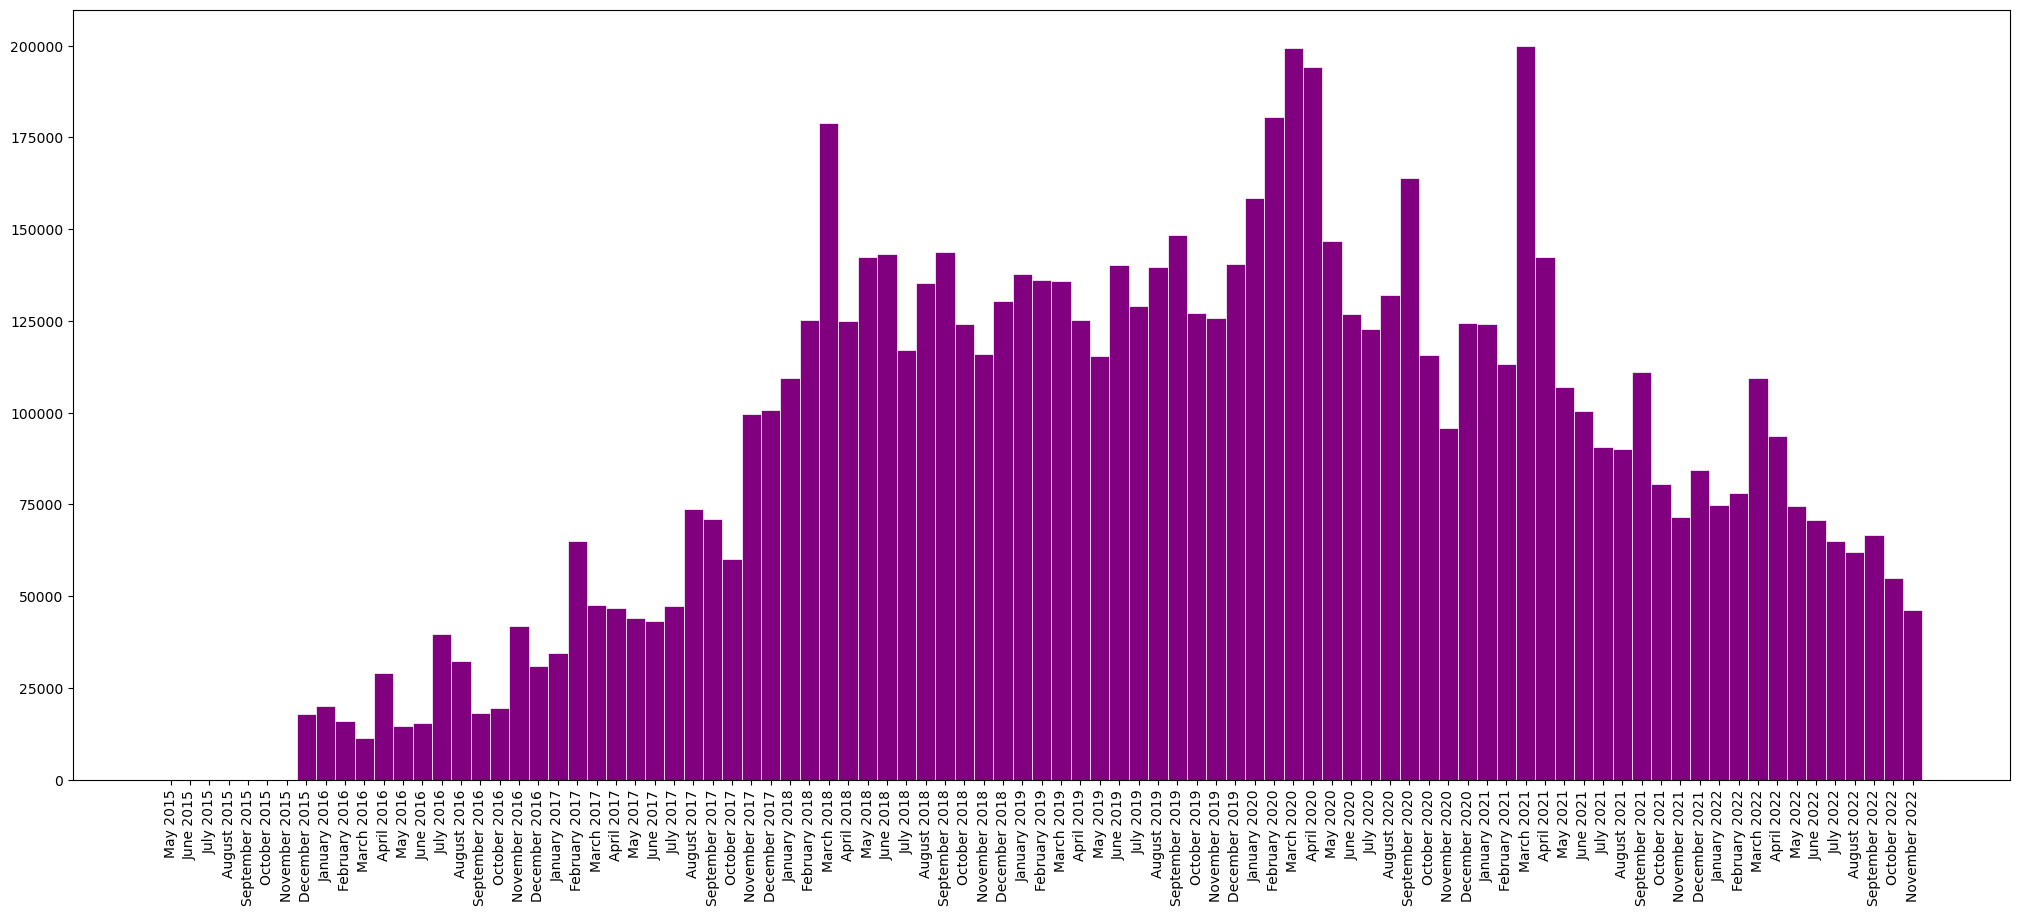

In [8]:
fig3, ax3 = plt.subplots()
ax3.bar(r6PlayerSort["Month"], r6PlayerSort["Peak"], width=1, edgecolor="white", linewidth=0.5, color = "Purple")
plt.gcf().set_size_inches(25, 10)
plt.xticks(rotation=90, ha = "center")  
plt.show()
# This is the full dataset

For some of the datasets like the one on top I will have to change. There are many months before the game released on Steam officially so for the sake of not weighing down the mean and potentially skewing the data one or another, I will remove those months from the Data.

In [2]:
# csgo_steam = rq.get("https://steamplayercount.com/app/730").content
# df_list2 = pd.read_html(csgo_steam)
# csgoPlayerData = df_list2[1]
# csgoPlayerData
# I will most likely be removing this dataset as finding patchnotes for the last 10 years will be incredibly difficult

In [12]:
valorant_tracker = rq.get("https://tracker.gg/valorant/population").content

In [68]:
df_list4 = pd.read_html(valorant_tracker)
valorantPlayerData = df_list4[0]
valorantPlayerData.head()
valorantPlayerData.to_csv('valorantPlayerData.csv', index=False)

In [95]:
valorantPatch = pd.read_csv('valorantPlayerData_Update.csv')
valorantPatch.head()
valorantPatch['Months'] = [dt.strptime(x, '%b-%y') for x in valorantPatch['Date']]
valorantPlayerSort = pd.DataFrame(valorantPatch.sort_values("Months", ascending = True))
valorantPlayerSort.head()

,Date,Players Count,Gain,% Gain,Patch,Months
41,Jun-20,848501,-,-,NaN,2020-06-01
40,Jul-20,5108718,4260217,502.10%,1.0,2020-07-01
39,Aug-20,8070836,2962118,58.00%,1.0,2020-08-01
38,Sep-20,7862431,-208405,-2.60%,1.0,2020-09-01
37,Oct-20,7604459,-257972,-3.30%,1.0,2020-10-01


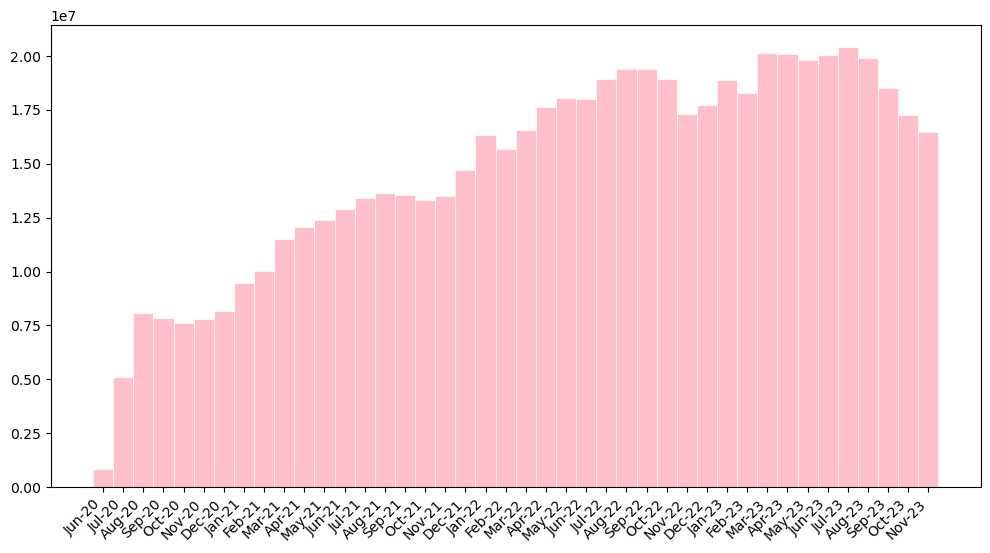

In [96]:
fig5, ax5 = plt.subplots()
ax5.bar(valorantPlayerSort["Date"], valorantPlayerSort["Players Count"], width=1, edgecolor="white", linewidth=0.5, color = "pink")
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")  
plt.show()

In [14]:
apex_steam = rq.get("https://steamcharts.com/app/1172470").content

In [15]:
df_list5 = pd.read_html(apex_steam)
apexPlayerData = df_list5[-1]
apexPlayerData
apexPlayerData.to_csv('apexPlayerData.csv', index=False)

In [61]:
apexPatch = pd.read_csv('apexPlayerData_Updated.csv')
apexPatch.head()

,Month,Avg. Players,Gain,% Gain,Peak Players,Patch
0,November-23,167296,-14125,-7.79%,438349,0
1,October-23,181420,-5074,-2.72%,435229,1
2,September-23,186494,-2397,-1.27%,452991,0
3,August-23,188892,22693,13.65%,451223,1
4,July-23,166199,-22902,-12.11%,349762,0


In [ ]:
apexPatch['Months'] = [dt.strptime(x, '%B-%y') for x in apexPatch['Month']]

For the datasets, I will be using the TTest to see whether or not a patch occuring within a month affects the overall player count. I believe the results will lean more towards having an effect. I will be comparing the overall Gain of players which can be positive or negative and putting it up against the Patch variable I created by finding the patch notes for each individual game and manually plotting for when a patch occured.

For the sake of consistency I am considering a patch as anything that fundanmentally changes gameplay so in short, bug fixes or Quality of Life improvements do not count as patches

In [ ]:
apexPlayerSort = pd.DataFrame(apexPatch.sort_values("Months", ascending = True))
apexPlayerSort.head()

In [41]:
result2 = stats.ttest_ind(apexPatch['Gain'],apexPatch['Patch'])

In [42]:
result2.statistic

0.5738491987159144

In [43]:
result2.pvalue

0.5678581897217655

In [40]:
result = stats.pearsonr(apexPatch['Gain'],apexPatch['Patch'])

In [45]:
result.statistic

0.6537399022594579

In [46]:
result.pvalue

1.1469692997032034e-05

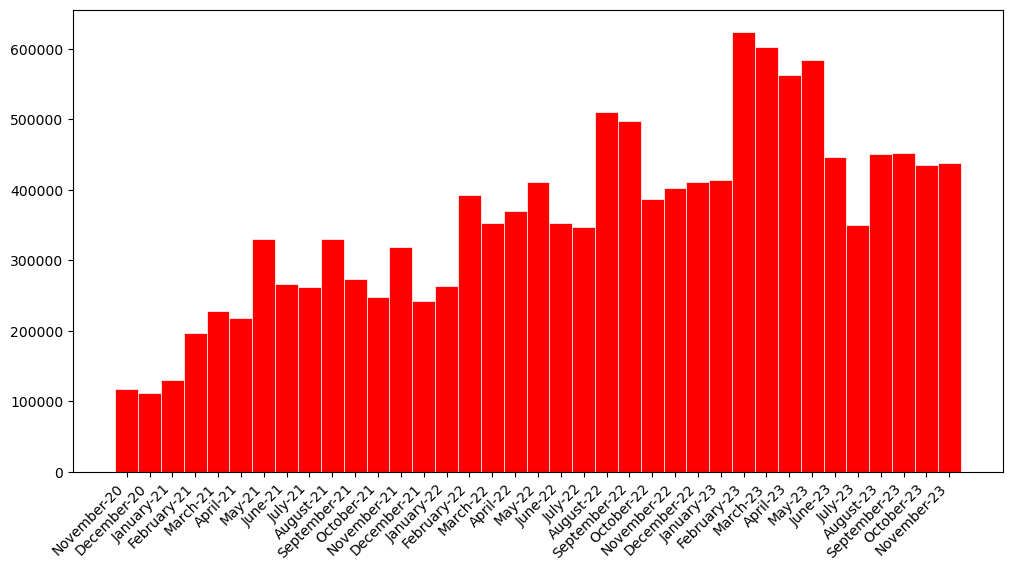

In [65]:
fig2, ax2 = plt.subplots()
ax2.bar(apexPlayerSort["Month"], apexPlayerSort["Peak Players"], width=1, edgecolor="white", linewidth=0.5, color = "red")

plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")  
plt.show()